# Initializations

In [1]:
from utils import *

udc = create_udc('IA-08RaCtrl:CO-PSCtrl-SI3')
ps1, ps2, ps3, ps4 = udc[1], udc[2], udc[3], udc[4]
psall = [ps1, ps2, ps3, ps4]
print()
print_info(psall)

PRUserial485 lib version_client: 2.3.3
PRUserial485 lib version_server: 1.3.3:fatal: Not a git repository (or any of the parent directories): .git

psname: SI-08M1:PS-CH     dev_id: 1
psname: SI-08M1:PS-CV     dev_id: 2
psname: SI-08M2:PS-CH     dev_id: 3
psname: SI-08M2:PS-CV     dev_id: 4

--- power supply status ---
state          :      6      6      6      6
open_loop      :      1      1      1      1
interface      :      0      0      0      0
active         :      1      1      1      1
model          :      1      1      1      1
unlock         :      1      1      1      1
wfmref_select  :      0      0      0      0
wfmref_maxsize :   1024   1024   1024   1024
wfmref_size    :   1024   1024   1024   1024
wfmref_idx     :   1024   1024   1024   1024
wfmref_ptr_beg :  57344  61440  65536  69632
wfmref_ptr_end :  59390  63486  67582  71678
wfmref_ptr_idx :  59390  63486  67582  71678


# Benchmarks

In [3]:
# Run timeit benchmarks

var_id=0
print('ps1.read_variable(var_id={})'.format(var_id))
%timeit ps1.read_variable(var_id, timeout=100)
print()

group_id=0
print('ps1.read_group_of_variables(group_id={})'.format(group_id))
%timeit ps1.read_group_of_variables(group_id, timeout=100)
print()

print('ps1.request_curve_block(curve_id=0, block=0)')
%timeit ps1.request_curve_block(curve_id=0, block=0, timeout=1000)
print()

print('ps1.psbsmp.wfmref_read()')
%timeit ps1.wfmref_read()
print()

c = [0.0 for i in range(1024)]
print('ps1.wfmref_write(size:{})'.format(len(c)))
%timeit ps1.wfmref_write(c)
print()

ps1.read_variable (var_id=0)
3.32 ms ± 78.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

ps1.read_group_of_variables(group_id=0)
11.6 ms ± 751 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

ps1.request_curve_block(curve_id=0, block=0)
23.7 ms ± 3.75 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

ps1.psbsmp.wfmref_read()
116 ms ± 7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

ps1.wfmref_write(size:1024)
90.2 ms ± 3.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)



In [65]:
# measure_duration_read_group_of_variables(ps1, group_id=0)

# measure_duration_request_curve_block(ps1, curve_id=0, block=0)
    
measure_duration_wfmref_read(ps1)

--- duration wfmref_read ---
python duration: 91.88 ms
prulib duration: 90.36 ms
serial duration: 7.03 ms


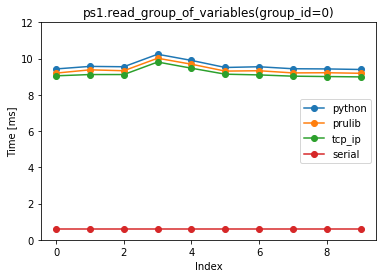

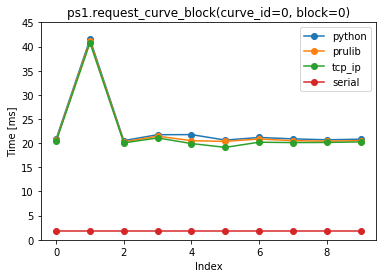

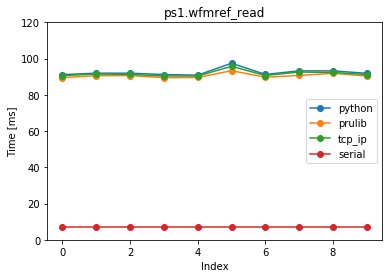

In [69]:
# sharkwire filter: ip.addr == 10.128.108.121 and (tcp.port == 5000 or tcp.port == 6001) and data.len != 0

# Measurement 1
title = 'ps1.read_group_of_variables(group_id=0)'
python = [9.43, 9.57, 9.55, 10.24, 9.90, 9.51, 9.55, 9.44, 9.43, 9.40, ]
prulib = [9.20, 9.38, 9.33, 10.02, 9.69, 9.31, 9.33, 9.21, 9.22, 9.19, ]
tcp_ip = [9.05, 9.12, 9.12, 9.81, 9.47, 9.14, 9.10, 9.03, 9.01, 8.99, ]
serial = [0.59,] * len(python)
plt.plot(python, '-o', label='python')
plt.plot(prulib, '-o', label='prulib')
plt.plot(tcp_ip, '-o', label='tcp_ip')
plt.plot(serial, '-o', label='serial')
plt.xlabel('Index')
plt.ylabel('Time [ms]')
plt.ylim(0, 12)
plt.legend()
plt.title(title)
plt.show()

# Measurement 2
title = 'ps1.request_curve_block(curve_id=0, block=0)'
python = [20.89, 41.52, 20.53, 21.75, 21.77, 20.64, 21.18, 20.89, 20.70, 20.82, ]
prulib = [20.60, 41.14, 20.26, 21.45, 20.51, 20.37, 20.86, 20.52, 20.42, 20.52, ]
tcp_ip = [20.39, 40.76, 20.06, 21.08, 19.92, 19.13, 20.20, 20.12, 20.15, 20.26, ]
serial = [1.73,] * len(python)
plt.plot(python, '-o', label='python')
plt.plot(prulib, '-o', label='prulib')
plt.plot(tcp_ip, '-o', label='tcp_ip')
plt.plot(serial, '-o', label='serial')
plt.xlabel('Index')
plt.ylabel('Time [ms]')
plt.ylim(0, 45)
plt.legend()
plt.title(title)
plt.show()

# Measurement 3
title = 'ps1.wfmref_read'
python = [91.16, 91.96, 91.94, 91.20, 90.85, 97.44, 91.25, 93.24, 93.22, 91.88, ]
prulib = [89.48, 90.58, 90.63, 89.47, 89.57, 93.33, 89.73, 90.69, 91.90, 90.36, ]
tcp_ip = [90.58, 91.50, 91.27, 90.44, 90.39, 95.74, 90.66, 92.59, 92.33, 91.21, ]
serial = [7.03,] * len(python)
plt.plot(python, '-o', label='python')
plt.plot(prulib, '-o', label='prulib')
plt.plot(tcp_ip, '-o', label='tcp_ip')
plt.plot(serial, '-o', label='serial')
plt.xlabel('Index')
plt.ylabel('Time [ms]')
plt.ylim(0, 120)
plt.legend()
plt.title(title)
plt.show()

# Test Curve Write (SLOWREF)

--- set slowref ---
state          :      3      3      3      3
open_loop      :      1      1      1      1
interface      :      0      0      0      0
active         :      1      1      1      1
model          :      1      1      1      1
unlock         :      1      1      1      1
---
wfmref_select  :      1      0      0      0
wfmref_maxsize :   1024   1024   1024   1024
wfmref_size    :   1024   1024   1024   1024
wfmref_idx     :   1025   1025   1025   1025
wfmref_ptr_beg :  59392  61440  65536  69632
wfmref_ptr_end :  61438  63486  67582  71678
wfmref_ptr_idx :  61440  63488  67584  71680

--- write zero ---
state          :      3      3      3      3
open_loop      :      1      1      1      1
interface      :      0      0      0      0
active         :      1      1      1      1
model          :      1      1      1      1
unlock         :      1      1      1      1
---
wfmref_select  :      0      1      1      1
wfmref_maxsize :   1024   1024   1024   1024
wfmref_

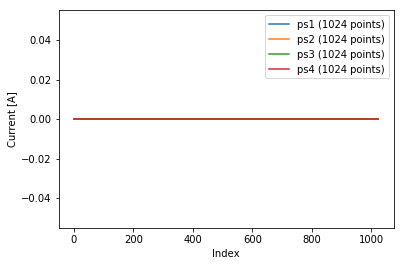


--- write amp-1.0 ---
state          :      3      3      3      3
open_loop      :      1      1      1      1
interface      :      0      0      0      0
active         :      1      1      1      1
model          :      1      1      1      1
unlock         :      1      1      1      1
---
wfmref_select  :      1      0      0      0
wfmref_maxsize :   1024   1024   1024   1024
wfmref_size    :   1024   1024   1024   1024
wfmref_idx     :   1025   1025   1025   1025
wfmref_ptr_beg :  59392  61440  65536  69632
wfmref_ptr_end :  61438  63486  67582  71678
wfmref_ptr_idx :  61440  63488  67584  71680


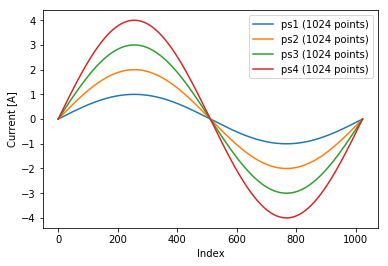

In [4]:
print('--- set slowref ---')
turn_on_opmode_slowref(psall)
print_status(psall)
print('---')
print_wfmref(psall)
print()

print('--- write zero ---')
set_wfmref(psall, amplitude=0.0)
print_status(psall)
print('---')
print_wfmref(psall)
plot_wfmref(psall)
print()

print('--- write amp-1.0 ---')
set_wfmref(psall, amplitude=1.0)
print_status(psall)
print('---')
print_wfmref(psall)
plot_wfmref(psall)
print()

# Test Curve Write (RMPWFM)

--- set slowref ---
state          :      3      3      3      3
open_loop      :      1      1      1      1
interface      :      0      0      0      0
active         :      1      1      1      1
model          :      1      1      1      1
unlock         :      1      1      1      1
---
wfmref_select  :      0      0      0      0
wfmref_maxsize :   1024   1024   1024   1024
wfmref_size    :   1024   1024   1024   1024
wfmref_idx     :   1025   1025   1025   1025
wfmref_ptr_beg :  57344  61440  65536  69632
wfmref_ptr_end :  59390  63486  67582  71678
wfmref_ptr_idx :  59392  63488  67584  71680

--- write zero ---
state          :      3      3      3      3
open_loop      :      1      1      1      1
interface      :      0      0      0      0
active         :      1      1      1      1
model          :      1      1      1      1
unlock         :      1      1      1      1
---
wfmref_select  :      1      1      1      1
wfmref_maxsize :   1024   1024   1024   1024
wfmref_

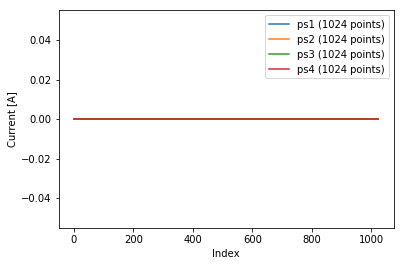


--- rmpwfm ---
state          :      6      6      6      6
open_loop      :      1      1      1      1
interface      :      0      0      0      0
active         :      1      1      1      1
model          :      1      1      1      1
unlock         :      1      1      1      1
---
wfmref_select  :      1      1      1      1
wfmref_maxsize :   1024   1024   1024   1024
wfmref_size    :   1024   1024   1024   1024
wfmref_idx     :   1025   1025   1025   1025
wfmref_ptr_beg :  59392  63488  67584  71680
wfmref_ptr_end :  61438  65534  69630  73726
wfmref_ptr_idx :  61440  65536  69632  73728

--- write amp 1.0 A ---
state          :      6      6      6      6
open_loop      :      1      1      1      1
interface      :      0      0      0      0
active         :      1      1      1      1
model          :      1      1      1      1
unlock         :      1      1      1      1
---
wfmref_select  :      1      1      1      1
wfmref_maxsize :   1024   1024   1024   1024
wfmref

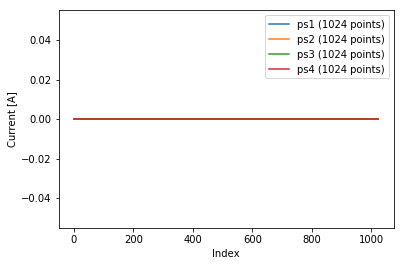


Trigger timing and press ENTER:

--- status ---
state          :      6      6      6      6
open_loop      :      1      1      1      1
interface      :      0      0      0      0
active         :      1      1      1      1
model          :      1      1      1      1
unlock         :      1      1      1      1
---
wfmref_select  :      0      0      0      0
wfmref_maxsize :   1024   1024   1024   1024
wfmref_size    :   1024   1024   1024   1024
wfmref_idx     :   1024   1024   1024   1024
wfmref_ptr_beg :  57344  61440  65536  69632
wfmref_ptr_end :  59390  63486  67582  71678
wfmref_ptr_idx :  59390  63486  67582  71678


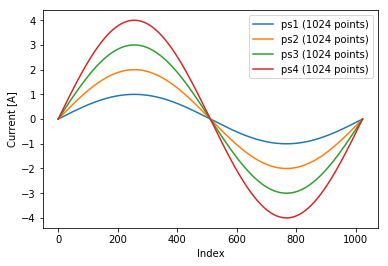

In [71]:
print('--- set slowref ---')
turn_on_opmode_slowref(psall)
print_status(psall)
print('---')
print_wfmref(psall)
print()

print('--- write zero ---')
set_wfmref(psall, amplitude=0.0)
print_status(psall)
print('---')
print_wfmref(psall)
plot_wfmref(psall)
print()

print('--- rmpwfm ---')
turn_on_opmode_rmpwfm(psall)
print_status(psall)
print('---')
print_wfmref(psall)
print()

print('--- write amp 1.0 A ---')
set_wfmref(psall, amplitude=1.0)
print_status(psall)
print('---')
print_wfmref(psall)
plot_wfmref(psall)
print()

input('Trigger timing and press ENTER:')
print()

print('--- status ---')
print_status(psall)
print('---')
print_wfmref(psall)
plot_wfmref(psall)
print()

# Misc

In [12]:
# --- reseta udc --
# process_response(ps1.execute_function(41, timeout=100, read_flag=False))

# --- desliga fontes ---
# process_response(ps1.execute_function(1, timeout=100))
# process_response(ps2.execute_function(1, timeout=100))
# process_response(ps3.execute_function(1, timeout=100))
# process_response(ps4.execute_function(1, timeout=100))

# --- liga fontes ---
# process_response(ps1.execute_function(0, timeout=100))
# process_response(ps2.execute_function(0, timeout=100))
# process_response(ps3.execute_function(0, timeout=100))
# process_response(ps4.execute_function(0, timeout=100))

# --- print info ---
# print_info([ps1, ps2, ps3, ps4])

# --- read variables ---
# ps1.read_variable(0, timeout=100)

# udc.reset()